In [19]:
import yfinance as yf

aapl = yf.Ticker("AAPL")
market_cap = aapl.info['marketCap']

In [20]:
market_cap

3766045638656

In [21]:
import yfinance as yf

# Lista de algunos tickers del S&P 500 (puedes ampliarla con todos los componentes)
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA']

# Diccionario para guardar capitalizaciones
market_caps = {}

# Obtener capitalización de cada empresa
for ticker in tickers:
    info = yf.Ticker(ticker).info
    market_caps[ticker] = info['marketCap']

# Calcular capitalización total del índice
total_market_cap = sum(market_caps.values())
tot=0
# Calcular y mostrar el peso de cada empresa
print("Pesos dentro del índice:")
for ticker, cap in market_caps.items():
    weight = cap / total_market_cap
    tot+=weight
    print(f"{ticker}: {weight:.4%}")
print(f"Total: {tot:.4%}")

Pesos dentro del índice:
AAPL: 21.6750%
MSFT: 21.9820%
GOOGL: 17.2920%
AMZN: 13.5749%
NVDA: 25.4761%
Total: 100.0000%


In [22]:
stock = yf.Ticker("AAPL")
info = stock.info

print("Nombre:", info['longName'])
print("Sector:", info['sector'])
print("P/E:", info['trailingPE'])
print("ROE:", info['returnOnEquity'])
print("Dividend Yield:", info['dividendYield'])
print("Crecimiento EPS:", info['earningsGrowth'])


Nombre: Apple Inc.
Sector: Technology
P/E: 38.50854
ROE: 1.49814
Dividend Yield: 0.41
Crecimiento EPS: 0.121


[*********************100%***********************]  5 of 5 completed


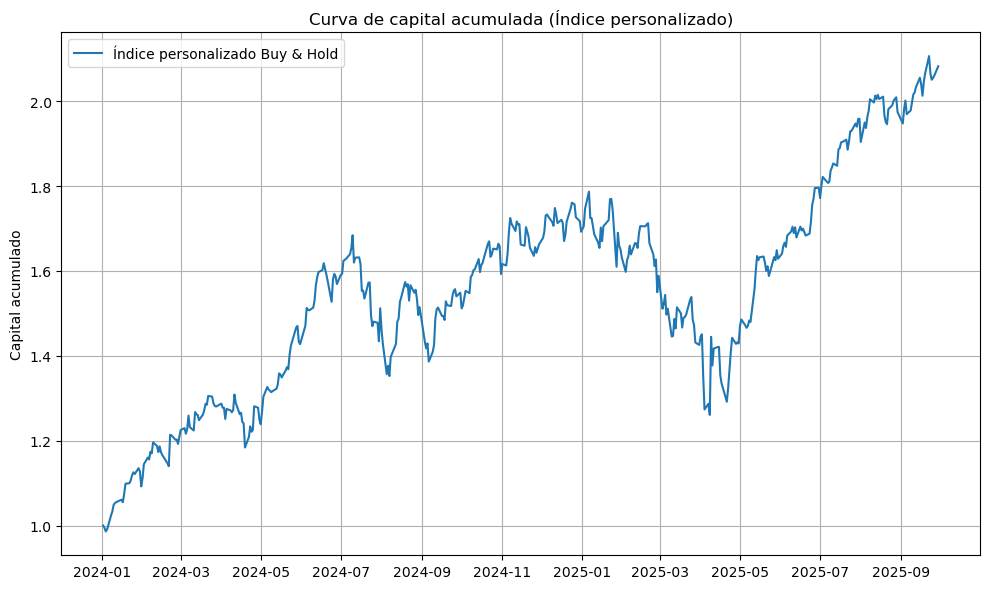

In [23]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Paso 1: Tickers seleccionados
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA']

# Paso 2: Obtener capitalizaciones y calcular pesos
market_caps = {}
for ticker in tickers:
    info = yf.Ticker(ticker).info
    market_caps[ticker] = info['marketCap']

total_market_cap = sum(market_caps.values())
weights = {ticker: cap / total_market_cap for ticker, cap in market_caps.items()}

# Paso 3: Descargar precios históricos
data = yf.download(tickers, start="2024-01-01", auto_adjust=True)['Close']

# Paso 4: Normalizar precios (todos empiezan en 1)
normalized = data / data.iloc[0]

# Paso 5: Aplicar pesos y sumar para formar el índice
custom_index = pd.Series(0, index=normalized.index)
for ticker in tickers:
    custom_index += normalized[ticker] * weights[ticker]

# Paso 6: Graficar curva Buy & Hold personalizada
plt.figure(figsize=(10,6))
plt.plot(custom_index, label='Índice personalizado Buy & Hold')
plt.title('Curva de capital acumulada (Índice personalizado)')
plt.ylabel('Capital acumulado')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

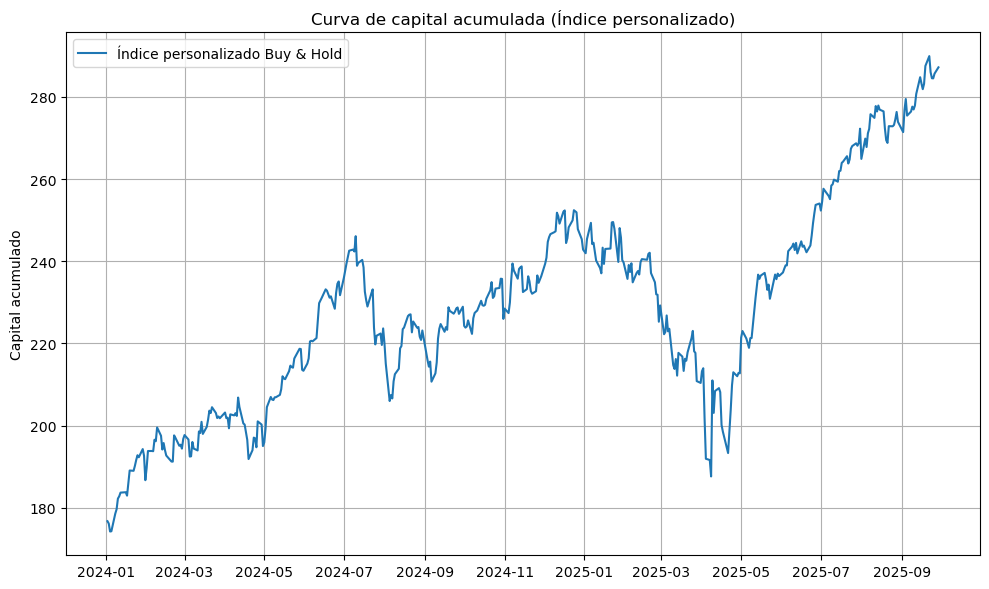

In [24]:
# Paso 5: Aplicar pesos y sumar para formar el índice
custom_index = pd.Series(0, index=data.index)
for ticker in tickers:
    custom_index += data[ticker] * weights[ticker]
    # Paso 6: Graficar curva Buy & Hold personalizada
plt.figure(figsize=(10,6))
plt.plot(custom_index, label='Índice personalizado Buy & Hold')
plt.title('Curva de capital acumulada (Índice personalizado)')
plt.ylabel('Capital acumulado')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [25]:
custom_index[0]

C:\Users\alfmi\AppData\Local\Temp\ipykernel_9320\2763522999.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  custom_index[0]


176.72320699921835

[*********************100%***********************]  6 of 6 completed



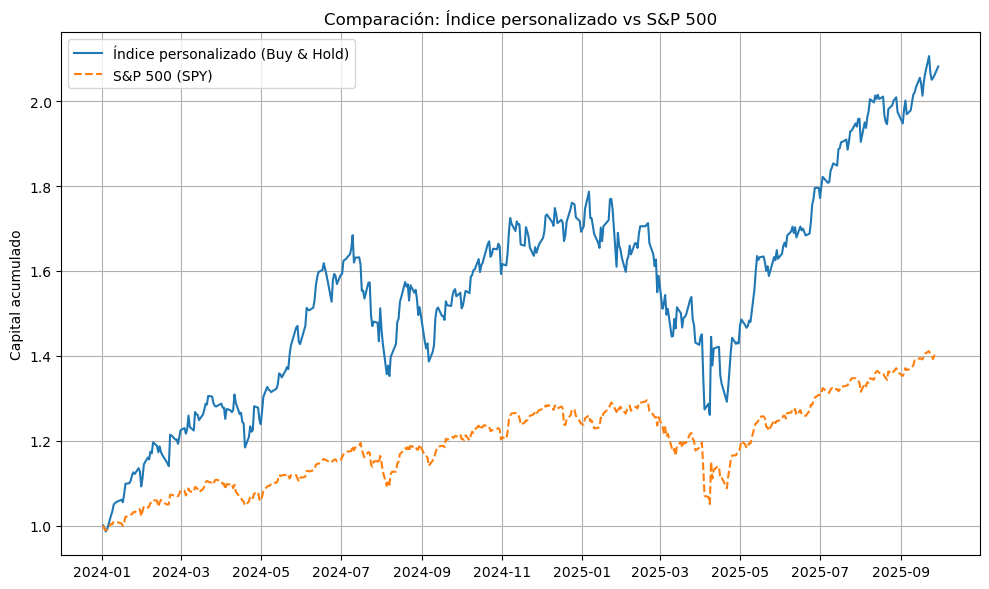

In [38]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Tickers seleccionados
#tickers = ['ROP','D']
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA']
# Obtener capitalizaciones y calcular pesos
market_caps = {}
for ticker in tickers:
    info = yf.Ticker(ticker).info
    market_caps[ticker] = info['marketCap']

total_market_cap = sum(market_caps.values())
weights = {ticker: cap / total_market_cap for ticker, cap in market_caps.items()}

# Descargar precios históricos
data = yf.download(tickers + ['^GSPC'], start="2024-01-01", auto_adjust=True)['Close']

# Normalizar precios (todos empiezan en 1)
normalized = data / data.iloc[0]

# Construir índice personalizado
custom_index = pd.Series(0, index=normalized.index)
for ticker in tickers:
    custom_index += normalized[ticker] * weights[ticker]

# Normalizar SPY para comparación
spy_curve = normalized['^GSPC']

# Graficar ambas curvas
plt.figure(figsize=(10,6))
plt.plot(custom_index, label='Índice personalizado (Buy & Hold)')
plt.plot(spy_curve, label='S&P 500 (SPY)', linestyle='--')
plt.title('Comparación: Índice personalizado vs S&P 500')
plt.ylabel('Capital acumulado')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Pesos iguales:
AAPL: 20.00%
MSFT: 20.00%
GOOGL: 20.00%
AMZN: 20.00%
NVDA: 20.00%


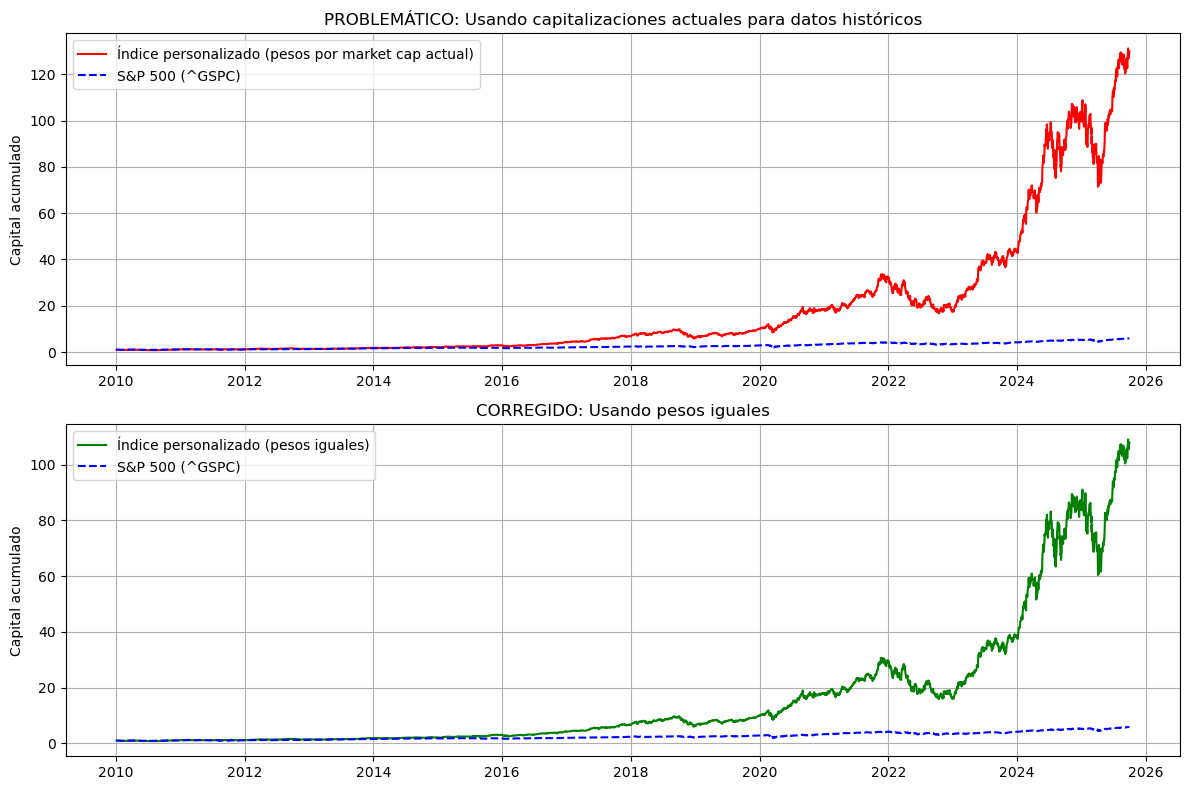


Retorno total S&P 500: 487.9%
Retorno con pesos por cap actual: 12889.1%
Retorno con pesos iguales: 10693.2%


In [29]:
# VERSIÓN CORREGIDA 1: Pesos iguales (elimina sesgo de capitalización)
# =================================================================

# Usar pesos iguales en lugar de por capitalización actual
equal_weights = {ticker: 1/len(tickers) for ticker in tickers}

print("Pesos iguales:")
for ticker, weight in equal_weights.items():
    print(f"{ticker}: {weight:.2%}")

# Construir índice con pesos iguales
custom_index_equal = pd.Series(0, index=normalized.index)
for ticker in tickers:
    custom_index_equal += normalized[ticker] * equal_weights[ticker]

# Graficar comparación
plt.figure(figsize=(12,8))

# Primer subplot: Pesos por capitalización (problemático)
plt.subplot(2,1,1)
plt.plot(custom_index, label='Índice personalizado (pesos por market cap actual)', color='red')
plt.plot(spy_curve, label='S&P 500 (^GSPC)', linestyle='--', color='blue')
plt.title('PROBLEMÁTICO: Usando capitalizaciones actuales para datos históricos')
plt.ylabel('Capital acumulado')
plt.legend()
plt.grid(True)

# Segundo subplot: Pesos iguales (más realista)
plt.subplot(2,1,2)
plt.plot(custom_index_equal, label='Índice personalizado (pesos iguales)', color='green')
plt.plot(spy_curve, label='S&P 500 (^GSPC)', linestyle='--', color='blue')
plt.title('CORREGIDO: Usando pesos iguales')
plt.ylabel('Capital acumulado')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Comparar retornos finales
print(f"\nRetorno total S&P 500: {spy_curve.iloc[-1]-1:.1%}")
print(f"Retorno con pesos por cap actual: {custom_index.iloc[-1]-1:.1%}")
print(f"Retorno con pesos iguales: {custom_index_equal.iloc[-1]-1:.1%}")

Pesos aproximados en S&P 500 en 2010:
AAPL: 1.5%
MSFT: 2.0%
GOOGL: 1.2%
AMZN: 0.8%
NVDA: 0.2%
Total de los 5 stocks: 5.7% (vs 100.0% en pesos iguales)


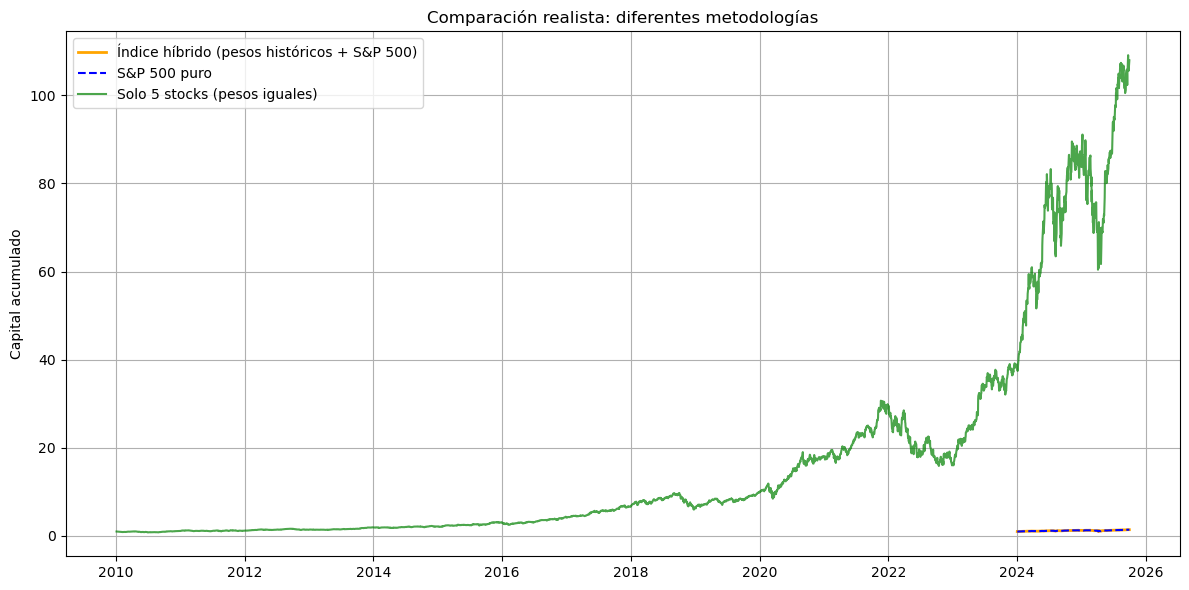


Retornos finales:
S&P 500 puro: 40.3%
Híbrido (histórico): 41.3%
Solo 5 stocks iguales: 10693.2%
Solo 5 stocks (cap actual): 108.2%


In [39]:
# VERSIÓN CORREGIDA 2: Aproximación más realista del S&P 500
# =================================================================

# Los 5 stocks que elegiste son "winners" conocidos. 
# Para una comparación más justa, veamos sus pesos aproximados en 2010:

# Pesos aproximados en el S&P 500 circa 2010 (mucho menores que ahora)
weights_2010_approx = {
    'AAPL': 0.015,   # ~1.5% en 2010 vs ~7% ahora
    'MSFT': 0.020,   # ~2.0% en 2010 vs ~3% ahora  
    'GOOGL': 0.012,  # ~1.2% en 2010 vs ~4% ahora
    'AMZN': 0.008,   # ~0.8% en 2010 vs ~3% ahora
    'NVDA': 0.002    # ~0.2% en 2010 vs ~3% ahora
}

print("Pesos aproximados en S&P 500 en 2010:")
total_weight_2010 = sum(weights_2010_approx.values())
for ticker, weight in weights_2010_approx.items():
    print(f"{ticker}: {weight:.1%}")
print(f"Total de los 5 stocks: {total_weight_2010:.1%} (vs {total_weight_2010*100/5.7:.1%} en pesos iguales)")

# Construir índice con pesos históricos más realistas
custom_index_realistic = pd.Series(0, index=normalized.index)
for ticker in tickers:
    custom_index_realistic += normalized[ticker] * weights_2010_approx[ticker]

# Para simular el resto del S&P 500, agregamos el 94.3% restante usando el S&P 500
remaining_weight = 1 - total_weight_2010
custom_index_realistic += spy_curve * remaining_weight

# Comparación final
plt.figure(figsize=(12,6))
plt.plot(custom_index_realistic, label='Índice híbrido (pesos históricos + S&P 500)', color='orange', linewidth=2)
plt.plot(spy_curve, label='S&P 500 puro', linestyle='--', color='blue')
plt.plot(custom_index_equal, label='Solo 5 stocks (pesos iguales)', color='green', alpha=0.7)
plt.title('Comparación realista: diferentes metodologías')
plt.ylabel('Capital acumulado')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"\nRetornos finales:")
print(f"S&P 500 puro: {spy_curve.iloc[-1]-1:.1%}")
print(f"Híbrido (histórico): {custom_index_realistic.iloc[-1]-1:.1%}")
print(f"Solo 5 stocks iguales: {custom_index_equal.iloc[-1]-1:.1%}")
print(f"Solo 5 stocks (cap actual): {custom_index.iloc[-1]-1:.1%}")

[*********************100%***********************]  121 of 121 completed


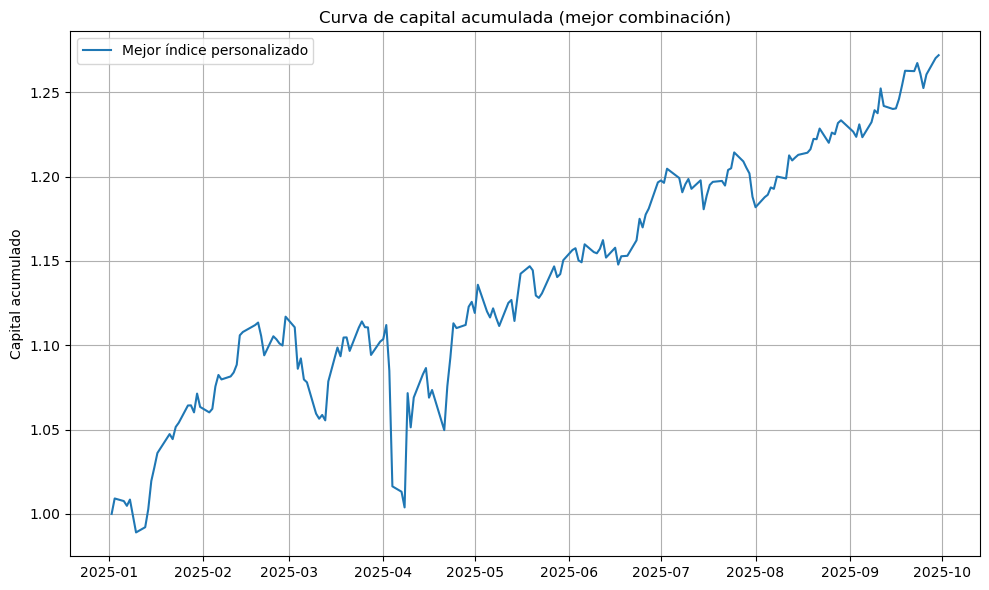


📈 Mejor combinación de acciones:
MCK, PM, WFC, BRK-B, BX, CRWD, PANW, DASH, AMGN, T, APH, KO, WELL, HOOD, DHR, BKNG, TMO, NEM, NKE, HCA

📊 Métricas:
CAGR: 38.30%
Volatilidad: 17.01%
Sharpe Ratio: 2.19
Max Drawdown: -10.12%


In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

# -----------------------------
# 1. Parámetros de simulación
# -----------------------------
NUM_COMBINATIONS = 100       # Número de combinaciones a probar
NUM_TICKERS_PER_INDEX = 20  # Número de acciones por índice
START_DATE = "2025-01-01"

# -----------------------------
# 2. Universo de acciones (puedes ampliarlo)
# -----------------------------
'''tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'TSLA', 'AVGO', 'LLY', 'NFLX',
           'ADBE', 'CRM', 'INTC', 'QCOM', 'TXN', 'AMD', 'COST', 'PEP', 'KO', 'WMT',
           'UNH', 'JNJ', 'PFE', 'TMO', 'ABBV', 'XOM', 'CVX', 'COP', 'SLB', 'EOG']'''

'''tickers= ["MA","NFLX","XOM","JNJ","PLTR","COST","HD","ABBV","BAC","PG","CVX","UNH","GE",
          "KO","WFC","TMUS","CSCO","AMD","IBM","MS","PM","GS","APP","AXP","CRM","ABT",
          "LIN","CAT","RTX","MCD","UBER","DIS","T","MRK","NOW","INTU","PEP","C","MU","VZ",
          "BLK","ANET","QCOM","TMO","BKNG","SCHW","TXN"]'''

tickers= ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'TSLA', 'AVGO', 'LLY',"GOOG","BRK-B",
          "ADBE", "CRM", "INTC", "WMT","JPM", "V","WMT","ORCL",
          "JNJ", "PFE", "COP", "SLB", "EOG",
          "MA","NFLX","XOM","PLTR","COST","HD","ABBV","BAC","PG","CVX","UNH","GE",
          "KO","WFC","TMUS","CSCO","AMD","IBM","MS","PM","GS","APP","AXP","CRM","ABT",
          "LIN","CAT","RTX","MCD","UBER","DIS","T","MRK","NOW","INTU","PEP","C","MU","VZ",
          "BLK","ANET","QCOM","TMO","BKNG","SCHW","TXN","LRCX","BA","GE","V","AMAT","INTC",
          "TJX","ISRG","NEE","ACN","ADBE","SPGI","APH","AMGN","BSX","PGR","ETN","COF","LOW",
          "SYK","UNP","GILD","KLAC","BX","PANW","PFE","DHR","HON","DE","CRWD","HOOD","MDT","KKR",
          "COP","ADI","WELL","ADP","DASH","CMCSA","LMT","MO","CB","PLD","CEG","SO","NKE","VRTX",
          "MMC","CME","SBUX","HCA","ICE","CVS","DUK","PH","CDNS","MCK","NEM","TT"]#primeros 120 de s&p500 por market cap
# -----------------------------
# 3. Descargar precios históricos
# -----------------------------
data = yf.download(tickers, start=START_DATE, auto_adjust=True)['Close']
data = data.dropna(axis=1)  # eliminar columnas con datos faltantes

# -----------------------------
# 4. Función para calcular métricas
# -----------------------------
def calculate_metrics(curve, risk_free_rate=0.01):
    returns = curve.pct_change().dropna()
    years = (curve.index[-1] - curve.index[0]).days / 365.25
    cagr = (curve.iloc[-1] / curve.iloc[0]) ** (1 / years) - 1
    volatility = returns.std() * np.sqrt(252)
    sharpe = (cagr - risk_free_rate) / volatility if volatility != 0 else np.nan
    rolling_max = curve.cummax()
    drawdown = curve / rolling_max - 1
    max_dd = drawdown.min()
    return cagr, volatility, sharpe, max_dd

# -----------------------------
# 5. Simulación de combinaciones
# -----------------------------
results = []

for i in range(NUM_COMBINATIONS):
    subset = random.sample(list(data.columns), NUM_TICKERS_PER_INDEX)

    # Obtener capitalizaciones y calcular pesos
    market_caps = {}
    for ticker in subset:
        try:
            info = yf.Ticker(ticker).info
            market_caps[ticker] = info['marketCap']
        except:
            market_caps[ticker] = 1  # fallback si falla

    total_cap = sum(market_caps.values())
    weights = {ticker: market_caps[ticker] / total_cap for ticker in subset}

    # Normalizar precios
    normalized = data[subset] / data[subset].iloc[0]

    # Construir índice personalizado
    index_curve = sum(normalized[t] * weights[t] for t in subset)

    # Calcular métricas
    cagr, vol, sharpe, dd = calculate_metrics(index_curve)
    results.append({
        'tickers': subset,
        'weights': weights,
        'curve': index_curve,
        'CAGR': cagr,
        'Volatility': vol,
        'Sharpe': sharpe,
        'Drawdown': dd
    })

# -----------------------------
# 6. Seleccionar el mejor índice
# -----------------------------
best = max(results, key=lambda x: x['Sharpe'])

# -----------------------------
# 7. Graficar el mejor índice
# -----------------------------
plt.figure(figsize=(10,6))
plt.plot(best['curve'], label='Mejor índice personalizado')
plt.title('Curva de capital acumulada (mejor combinación)')
plt.ylabel('Capital acumulado')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# -----------------------------
# 8. Mostrar métricas
# -----------------------------
print("\n📈 Mejor combinación de acciones:")
print(", ".join(best['tickers']))
print("\n📊 Métricas:")
print(f"CAGR: {best['CAGR']:.2%}")
print(f"Volatilidad: {best['Volatility']:.2%}")
print(f"Sharpe Ratio: {best['Sharpe']:.2f}")
print(f"Max Drawdown: {best['Drawdown']:.2%}")

In [ ]:
Mags = yf.download('MAGS', start=START_DATE, auto_adjust=True)['Close']
SPY = yf.download('SPY', start=START_DATE, auto_adjust=True)['Close']
Nasdaq = yf.download('^IXIC', start=START_DATE, auto_adjust=True)['Close']
Mags_curve = Mags / Mags.iloc[0]
SPY_curve = SPY / SPY.iloc[0]
Nasdaq_curve = Nasdaq / Nasdaq.iloc[0]

In [10]:
top10 = sorted(results, key=lambda x: x['Volatility'], reverse=False)[:10]



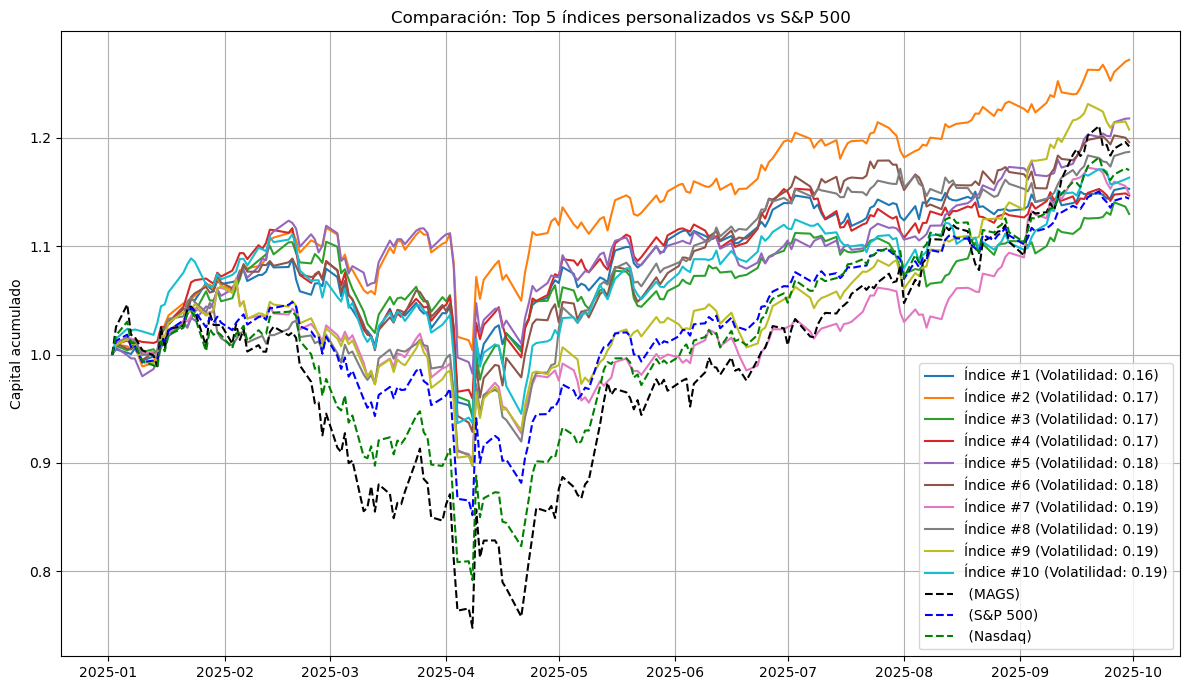

In [11]:
plt.figure(figsize=(12,7))
for i, result in enumerate(top10):
    plt.plot(result['curve'], label=f'Índice #{i+1} (Volatilidad: {result["Volatility"]:.2f})')
plt.plot(Mags_curve, label=' (MAGS)', linestyle='--', color='black')
plt.plot(SPY_curve, label=' (S&P 500)', linestyle='--', color='blue')
plt.plot(Nasdaq_curve, label=' (Nasdaq)', linestyle='--', color='green')
plt.title('Comparación: Top 5 índices personalizados vs S&P 500')
plt.ylabel('Capital acumulado')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:

# -----------------------------
for i, result in enumerate(top10[:5]):
    print(f"\n🏆 Índice #{i+1}")
    print("Acciones:", ", ".join(result['tickers']))
    print(f"CAGR: {result['CAGR']:.2%}")
    weights_str = ", ".join([f"{ticker}: {weight:.2%}" for ticker, weight in result['weights'].items()])
    print(f"Weights: {weights_str}")
    print(f"Volatilidad: {result['Volatility']:.2%}")
    print(f"Sharpe Ratio: {result['Sharpe']:.2f}")
    print(f"Max Drawdown: {result['Drawdown']:.2%}")



🏆 Índice #1
Acciones: UBER, ABT, INTU, MS, C, MCD, AMD, BLK, RTX, ABBV, KO, GE, PM, IBM, PLTR, CSCO, HD, JNJ, QCOM, BKNG
CAGR: 52.53%
Weights: UBER: 3.75%, ABT: 4.30%, INTU: 3.59%, MS: 4.70%, C: 3.42%, MCD: 4.05%, AMD: 4.87%, BLK: 3.36%, RTX: 4.15%, ABBV: 7.41%, KO: 5.31%, GE: 5.87%, PM: 4.78%, IBM: 5.02%, PLTR: 7.94%, CSCO: 5.03%, HD: 7.54%, JNJ: 8.17%, QCOM: 3.42%, BKNG: 3.30%
Volatilidad: 19.46%
Sharpe Ratio: 2.65
Max Drawdown: -16.28%

🏆 Índice #2
Acciones: CVX, GE, KO, LIN, MU, BKNG, HD, RTX, VZ, BAC, JNJ, TMUS, APP, WFC, C, ANET, PLTR, GS, CAT, TMO
CAGR: 56.29%
Weights: CVX: 5.97%, GE: 5.92%, KO: 5.35%, LIN: 4.19%, MU: 3.50%, BKNG: 3.32%, HD: 7.60%, RTX: 4.18%, VZ: 3.47%, BAC: 7.13%, JNJ: 8.23%, TMUS: 5.05%, APP: 4.27%, WFC: 5.00%, C: 3.45%, ANET: 3.41%, PLTR: 8.01%, GS: 4.47%, CAT: 4.15%, TMO: 3.30%
Volatilidad: 21.78%
Sharpe Ratio: 2.54
Max Drawdown: -20.83%

🏆 Índice #3
Acciones: PLTR, ANET, NOW, PM, ABT, GE, MS, BKNG, JNJ, INTU, QCOM, T, IBM, AMD, NFLX, TMO, ABBV, PG, VZ, MC

# Librería Ruptures - Detección de Puntos de Cambio

La librería `ruptures` es una herramienta poderosa para detectar cambios estructurales en series temporales. En finanzas es útil para:

- **Detectar cambios de régimen** en volatilidad o correlaciones
- **Identificar crisis financieras** o eventos importantes
- **Segmentar períodos** para análisis separados
- **Detectar cambios en tendencias** de precios

## Conceptos clave:
- **Change point**: Momento en el tiempo donde cambian las propiedades estadísticas de la serie
- **Cost function**: Función que mide la "homogeneidad" de un segmento
- **Penalty**: Parámetro que controla cuántos puntos de cambio detectar

## Principales algoritmos:
- `Pelt`: Rápido y eficiente para series largas
- `Dynp`: Programación dinámica, más preciso pero lento
- `BottomUp`: Método jerárquico
- `Window`: Ventana deslizante

[*********************100%***********************]  1 of 1 completed


Puntos de cambio detectados en AAPL:
1. 2023-03-22


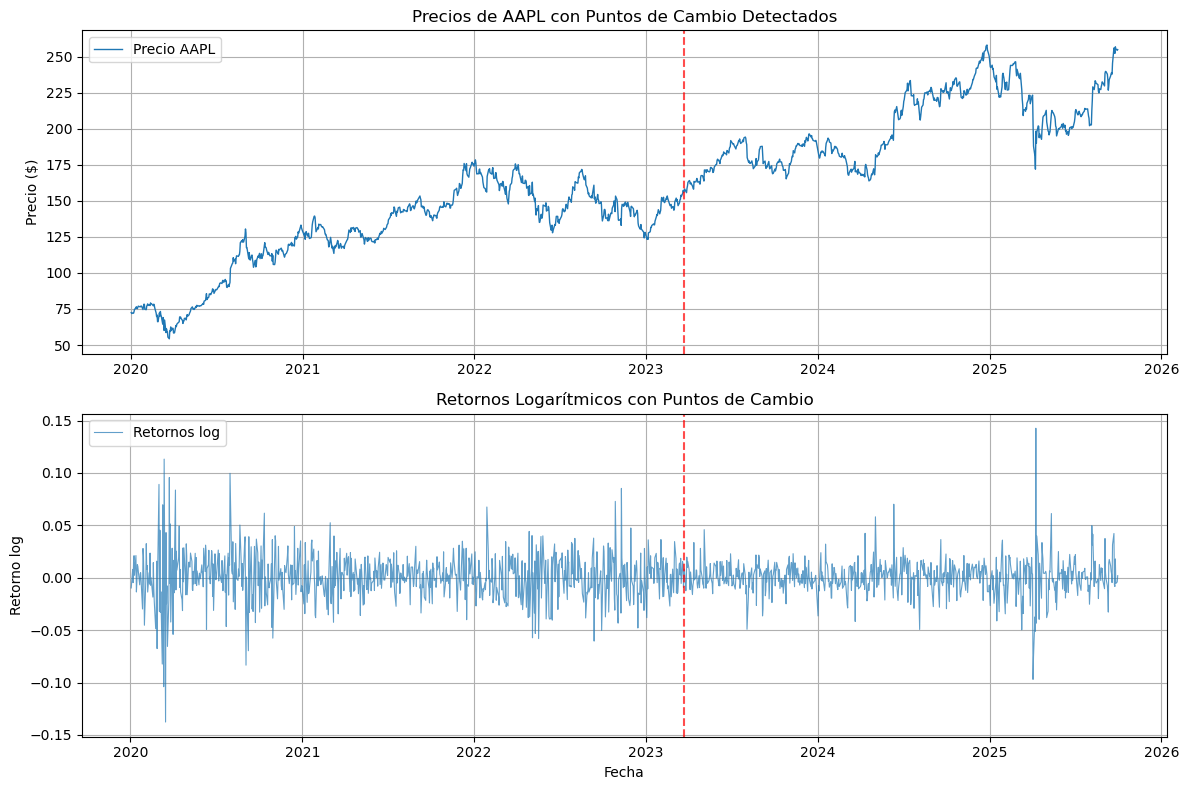

In [51]:
import ruptures as rpt
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# =====================================
# EJEMPLO 1: Detectar cambios en precios de una acción
# =====================================

# Descargar datos de AAPL desde 2020
aapl_data = yf.download("AAPL", start="2020-01-01", auto_adjust=True)['Close']

# Convertir a retornos logarítmicos (más estables para análisis)
returns = np.log(aapl_data / aapl_data.shift(1)).dropna()

# Configurar el detector de puntos de cambio
# - model="rbf": Detecta cambios en la media y varianza
# - min_size=30: Mínimo 30 días entre cambios
min_size=30
algo = rpt.Pelt(model="rbf", min_size=min_size).fit(returns.values)

# Detectar puntos de cambio (penalty controla sensibilidad)
# Penalty más alto = menos puntos de cambio
penalty = 10  # Experimenta con valores entre 5-20, 10
change_points = algo.predict(pen=penalty)

# Los índices se refieren a posiciones en el array, convertir a fechas
change_dates = [returns.index[cp-1] for cp in change_points[:-1]]  # -1 porque el último es el final

print(f"Puntos de cambio detectados en AAPL:")
for i, date in enumerate(change_dates):
    print(f"{i+1}. {date.strftime('%Y-%m-%d')}")

# Graficar resultados
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Gráfico 1: Precios con puntos de cambio
ax1.plot(aapl_data.index, aapl_data, label='Precio AAPL', linewidth=1)
for date in change_dates:
    ax1.axvline(x=date, color='red', linestyle='--', alpha=0.7)
ax1.set_title('Precios de AAPL con Puntos de Cambio Detectados')
ax1.set_ylabel('Precio ($)')
ax1.legend()
ax1.grid(True)

# Gráfico 2: Retornos con puntos de cambio
ax2.plot(returns.index, returns, label='Retornos log', linewidth=0.8, alpha=0.7)
for date in change_dates:
    ax2.axvline(x=date, color='red', linestyle='--', alpha=0.7)
ax2.set_title('Retornos Logarítmicos con Puntos de Cambio')
ax2.set_ylabel('Retorno log')
ax2.set_xlabel('Fecha')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


Cambios en volatilidad detectados:
1. 2020-02-28 - Vol antes: 0.0199, después: 0.0499
2. 2020-05-04 - Vol antes: 0.0409, después: 0.0175
3. 2020-07-29 - Vol antes: 0.0175, después: 0.0276
4. 2020-09-02 - Vol antes: 0.0272, después: 0.0333
5. 2020-10-01 - Vol antes: 0.0339, después: 0.0264
6. 2020-11-27 - Vol antes: 0.0259, después: 0.0165
7. 2021-01-05 - Vol antes: 0.0165, después: 0.0213
8. 2021-04-01 - Vol antes: 0.0230, después: 0.0157
9. 2021-06-07 - Vol antes: 0.0151, después: 0.0110
10. 2021-12-02 - Vol antes: 0.0118, después: 0.0188
11. 2022-05-04 - Vol antes: 0.0180, después: 0.0297
12. 2022-06-09 - Vol antes: 0.0306, después: 0.0259
13. 2022-07-11 - Vol antes: 0.0257, después: 0.0174
14. 2022-09-13 - Vol antes: 0.0159, después: 0.0229
15. 2022-11-01 - Vol antes: 0.0240, después: 0.0308
16. 2022-12-07 - Vol antes: 0.0308, después: 0.0206
17. 2023-01-23 - Vol antes: 0.0204, después: 0.0157
18. 2023-03-21 - Vol antes: 0.0157, después: 0.0127
19. 2023-06-01 - Vol antes: 0.0138, d

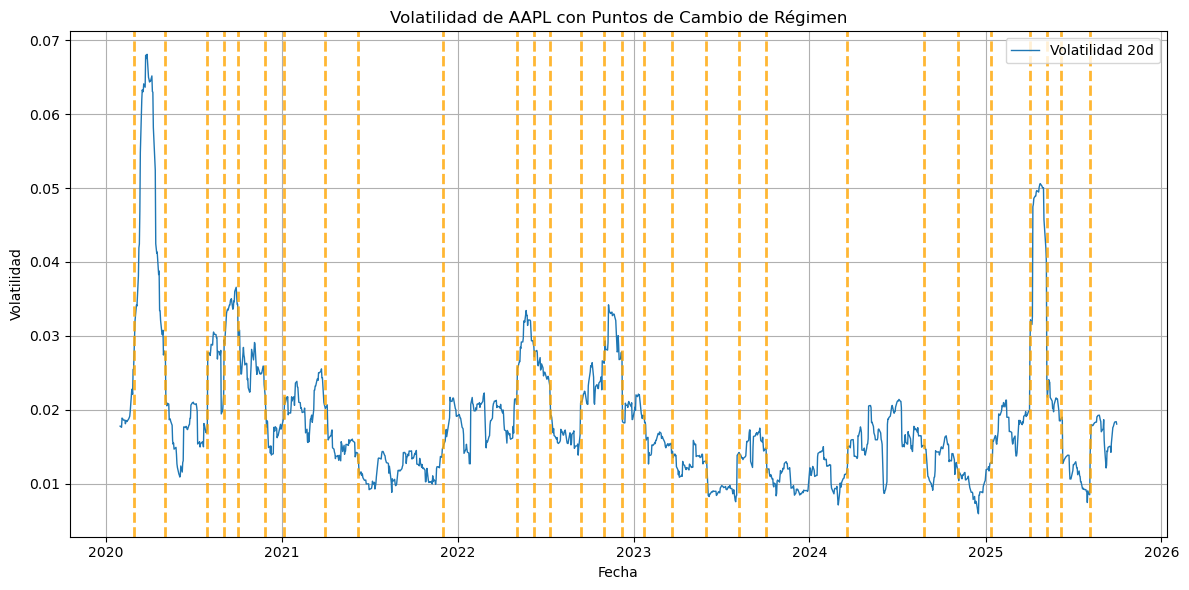

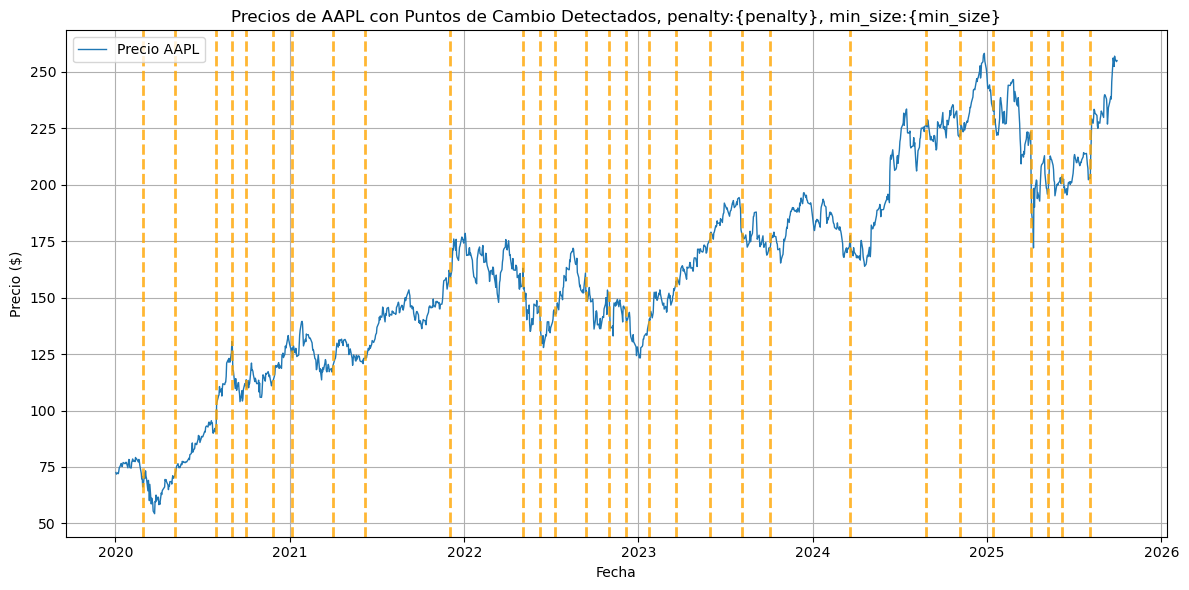

In [52]:
# =====================================
# EJEMPLO 2: Detectar cambios en VOLATILIDAD
# =====================================

# Calcular volatilidad rolling de 20 días
volatility = returns.rolling(window=20).std().dropna()

# Detector específico para cambios en varianza
algo_var = rpt.Pelt(model="rbf", min_size=20).fit(volatility.values)
vol_changes = algo_var.predict(pen=5)
vol_change_dates = [volatility.index[cp-1] for cp in vol_changes[:-1]]

# Corrected code
print(f"\nCambios en volatilidad detectados:")
for i, date in enumerate(vol_change_dates):
    # Get data before and after the change point
    data_before = volatility.loc[:date]
    data_after = volatility.loc[date:]
    
    # Calculate mean volatility before change point
    if len(data_before) >= 20:
        vol_before = data_before.iloc[-20:].mean()
    else:
        vol_before = data_before.mean()
    
    # Calculate mean volatility after change point  
    if len(data_after) >= 20:
        vol_after = data_after.iloc[:20].mean()
    else:
        vol_after = data_after.mean()
    
    # Convert to scalar if still Series (safety check)
    if hasattr(vol_before, 'item'):
        vol_before = vol_before.item()
    if hasattr(vol_after, 'item'):
        vol_after = vol_after.item()
    
    print(f"{i+1}. {date.strftime('%Y-%m-%d')} - Vol antes: {vol_before:.4f}, después: {vol_after:.4f}")


# Graficar volatilidad con cambios
plt.figure(figsize=(12, 6))

plt.plot(volatility.index, volatility, label='Volatilidad 20d', linewidth=1)
for date in vol_change_dates:
    plt.axvline(x=date, color='orange', linestyle='--', alpha=0.8, linewidth=2)
plt.title('Volatilidad de AAPL con Puntos de Cambio de Régimen')
plt.ylabel('Volatilidad')
plt.xlabel('Fecha')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#hacemos un segundo plot para mostrar aapl_data

plt.figure(figsize=(12, 6))

plt.plot(aapl_data.index, aapl_data, label='Precio AAPL', linewidth=1)
for date in vol_change_dates:
    plt.axvline(x=date, color='orange', linestyle='--', alpha=0.8, linewidth=2)
plt.title('Precios de AAPL con Puntos de Cambio Detectados, penalty:{penalty}, min_size:{min_size}')
plt.ylabel('Precio ($)')
plt.xlabel('Fecha')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## ff

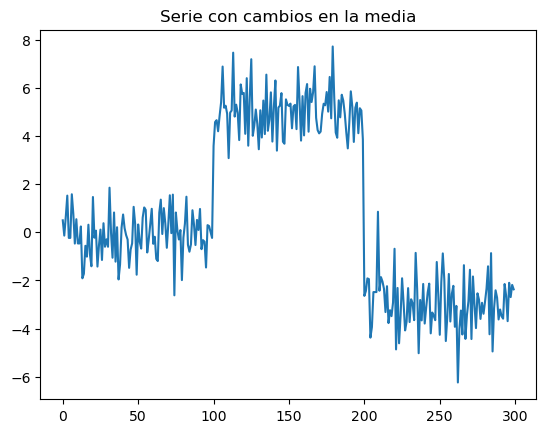

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Crear una serie con cambios en la media
np.random.seed(42)
n = 300
signal = np.concatenate([
    np.random.normal(loc=0, scale=1, size=100),
    np.random.normal(loc=5, scale=1, size=100),
    np.random.normal(loc=-3, scale=1, size=100),
])

plt.plot(signal)
plt.title("Serie con cambios en la media")
plt.show()


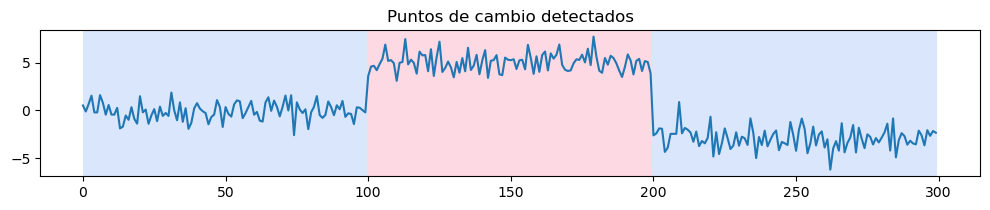

Cambios detectados en: [100, 200, 300]


In [54]:
import ruptures as rpt

# Usamos el modelo 'l2' que detecta cambios en la media
model = "l2"
algo = rpt.KernelCPD(kernel="linear").fit(signal.reshape(-1, 1))

# Detectamos 2 cambios
n_bkps = 2
result = algo.predict(n_bkps=n_bkps)

# Mostrar resultado
rpt.display(signal, result)
plt.title("Puntos de cambio detectados")
plt.show()

print("Cambios detectados en:", result)


In [55]:
# Ejemplo simple: calculamos los intervalos entre cambios
# y asumimos que se repite el patrón

bkps = result  # por ejemplo: [100, 200, 300]
intervalos = np.diff([0] + bkps)  # [100, 100, 100]

# Si el patrón continúa, predecimos:
proximo_cambio = bkps[-1] + intervalos[-1]
print(f"Predicción ingenua: próximo cambio en el índice {proximo_cambio}")


Predicción ingenua: próximo cambio en el índice 400
